# import the Selenium library to extract data

In [1]:
import requests # HTTP requests send
from bs4 import BeautifulSoup as bts

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Initialize the WebDriver (provide the path to your WebDriver executable)
driver = webdriver.Chrome()

# Open the WhatsApp page on the Play Store
url = "https://play.google.com/store/apps/details?id=com.whatsapp&hl=en&gl=US"
driver.get(url)

# Click on "See All Reviews" button
try:
    see_all_reviews_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//span[text()='See all reviews']"))
    )
    see_all_reviews_button.click()
    
    print("done")
except Exception as e:
    print(f"Error: {str(e)}")
    driver.quit()

# Wait for the reviews pop-up to load
try:
    reviews_popup = WebDriverWait(driver,2000 ).until(
        EC.presence_of_element_located((By.CLASS_NAME, "jgIq1"))
    )
    print("done")
    # Scroll through the reviews and print them
    scroll_count = 0
    while scroll_count < 1000:  # Scroll 10 times (adjust as needed)
        try:
            print("done1")
            driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)  # Scroll to the bottom of the pop-up
            print("done2")
            scroll_count += 1
        except Exception as e:
            print(f"Error scrolling: {str(e)}")
            break  # Exit the loop if scrolling fails
    reviews = driver.find_elements(By.CLASS_NAME, "fysCi")
    html_content = reviews[0].get_attribute('innerHTML')
    
        # Extract and print reviews
        # reviews = driver.find_elements(By.CLASS_NAME, "odk6He")
        # for i, review in enumerate(reviews):
        #     print(f"Review {i + 1}: {review.text}")
except Exception as e:
    print(f"Error: {str(e)}")
    driver.quit()
    
driver.quit()


KeyboardInterrupt: 

In [ ]:
soup = bts(html_content,'html.parser')

In [ ]:
# Assuming you have a BeautifulSoup object 'soup'
content = soup.find_all(class_="h3YV2d")

In [ ]:
time = soup.find_all(class_="bp9Aid")

In [ ]:
time

In [10]:
ratings = soup.find_all(class_="iXRFPc")
type(ratings)

bs4.element.ResultSet

In [11]:
data = []
for i in content:
    con=i.text
    data.append(con)

In [12]:
len(data)

40

In [13]:
time_data = []
for i in time:
    con_1=i.text
    time_data.append(con_1)

In [14]:
len(time_data)

40

In [15]:
ratings_list = []

for i in ratings:
    rat = i['aria-label']
    ratings_list.append(rat)
    
    
print(ratings_list)

['Rated 2 stars out of five stars', 'Rated 4 stars out of five stars', 'Rated 5 stars out of five stars', 'Rated 2 stars out of five stars', 'Rated 1 stars out of five stars', 'Rated 2 stars out of five stars', 'Rated 1 stars out of five stars', 'Rated 3 stars out of five stars', 'Rated 1 stars out of five stars', 'Rated 1 stars out of five stars', 'Rated 2 stars out of five stars', 'Rated 4 stars out of five stars', 'Rated 1 stars out of five stars', 'Rated 1 stars out of five stars', 'Rated 3 stars out of five stars', 'Rated 5 stars out of five stars', 'Rated 1 stars out of five stars', 'Rated 2 stars out of five stars', 'Rated 5 stars out of five stars', 'Rated 3 stars out of five stars', 'Rated 1 stars out of five stars', 'Rated 4 stars out of five stars', 'Rated 4 stars out of five stars', 'Rated 1 stars out of five stars', 'Rated 1 stars out of five stars', 'Rated 2 stars out of five stars', 'Rated 5 stars out of five stars', 'Rated 5 stars out of five stars', 'Rated 4 stars out 

In [97]:
rat

'Rated 2 stars out of five stars'

In [116]:
final_data = pd.DataFrame(columns = ['Ratings','Time','Reviews'])

In [117]:
final_data['Reviews']=data

In [118]:
final_data['Time']=time_data

In [119]:
final_data['Ratings']=ratings_list

In [120]:
final_data

,Ratings,Time,Reviews
0,Rated 2 stars out of five stars,"September 13, 2023","Since the last 2-3 updates, the application wo..."
1,Rated 4 stars out of five stars,"September 9, 2023",There's no feature to share my screen. Update ...
2,Rated 5 stars out of five stars,"September 6, 2023",It's an awesome app! I've used it for 8 years....
3,Rated 2 stars out of five stars,"August 19, 2023","The app tries to improve, but takes a step bac..."
4,Rated 1 stars out of five stars,"September 14, 2023","Amazing app, so very useful for communication,..."
...,...,...,...
155,Rated 1 stars out of five stars,"July 11, 2023","Functional, but once it takes up space, I woul..."
156,Rated 3 stars out of five stars,"August 29, 2023",This app is a wonderful platform. After the la...
157,Rated 2 stars out of five stars,"August 24, 2023",The recent UI update has been frustrating. The...
158,Rated 4 stars out of five stars,"September 10, 2023","I think Whatsapp is a great app, and is the No..."


In [121]:
import re

text = 'Rated 2 stars out of five stars'

# Use a regular expression to extract the number
match = re.search(r'\d+', text)

if match:
    extracted_number = match.group()
    print(extracted_number)


2


In [122]:
def get_rating(text):
    match = re.search(r'\d+', text)
    if match:
        extracted_number = match.group()
        return extracted_number

In [123]:
final_data['Ratings'] = final_data['Ratings'].apply(get_rating)

In [124]:
final_data

,Ratings,Time,Reviews
0,2,"September 13, 2023","Since the last 2-3 updates, the application wo..."
1,4,"September 9, 2023",There's no feature to share my screen. Update ...
2,5,"September 6, 2023",It's an awesome app! I've used it for 8 years....
3,2,"August 19, 2023","The app tries to improve, but takes a step bac..."
4,1,"September 14, 2023","Amazing app, so very useful for communication,..."
...,...,...,...
155,1,"July 11, 2023","Functional, but once it takes up space, I woul..."
156,3,"August 29, 2023",This app is a wonderful platform. After the la...
157,2,"August 24, 2023",The recent UI update has been frustrating. The...
158,4,"September 10, 2023","I think Whatsapp is a great app, and is the No..."


In [125]:
final_data['Time'] = pd.to_datetime(final_data['Time'])
final_data.set_index('Time', inplace=True)

In [126]:
final_data

,Ratings,Reviews
Time,,
2023-09-13,2,"Since the last 2-3 updates, the application wo..."
2023-09-09,4,There's no feature to share my screen. Update ...
2023-09-06,5,It's an awesome app! I've used it for 8 years....
2023-08-19,2,"The app tries to improve, but takes a step bac..."
2023-09-14,1,"Amazing app, so very useful for communication,..."
...,...,...
2023-07-11,1,"Functional, but once it takes up space, I woul..."
2023-08-29,3,This app is a wonderful platform. After the la...
2023-08-24,2,The recent UI update has been frustrating. The...


In [158]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'C:/Users/hp/Desktop/my notes/SEM 3/vandana maam/final_data.csv'

# Save the DataFrame to a CSV file
final_data.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column

In [2]:
import pandas as pd
final_data = pd.read_csv('final_data.csv')

In [3]:
final_data.shape

(10600, 1)

In [4]:
final_data.dtypes

Reviews    object
dtype: object

In [5]:
final_data_copy = final_data

In [6]:
import json
import nltk.sentiment

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

analyzer = nltk.sentiment.SentimentIntensityAnalyzer()

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\hp/nltk_data'
    - 'C:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


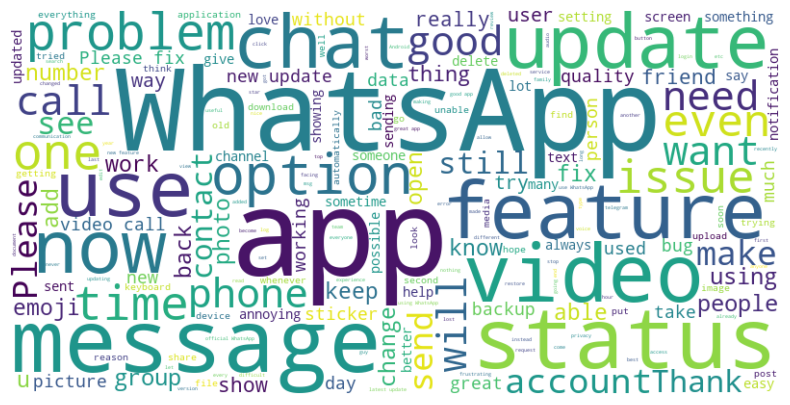

In [9]:
# Word Cloud Visualisation - used to visualise teh 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a 'reviews' Series or list of reviews
text = ' '.join(final_data['Reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


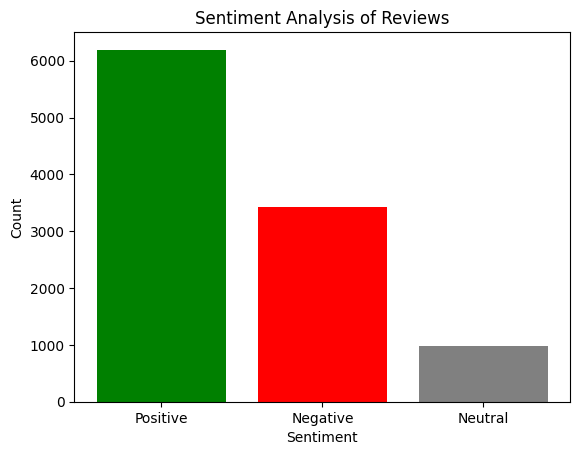

6194
3426
980


In [10]:
import pandas as pd
from textblob import TextBlob

# Assuming you have a DataFrame 'df' with a 'Reviews' column
sentiment_scores = final_data['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Positive, Negative, Neutral classification
positive_reviews = final_data.loc[sentiment_scores > 0, 'Reviews'].tolist()
negative_reviews = final_data.loc[sentiment_scores < 0, 'Reviews'].tolist()
neutral_reviews = final_data.loc[sentiment_scores == 0, 'Reviews'].tolist()

# Count the number of reviews in each category
positive_count = len(positive_reviews)
negative_count = len(negative_reviews)
neutral_count = len(neutral_reviews)

# Create a bar graph
categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.bar(categories, counts, color=['green', 'red', 'gray'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


print(positive_count)
print(negative_count)
print(neutral_count)

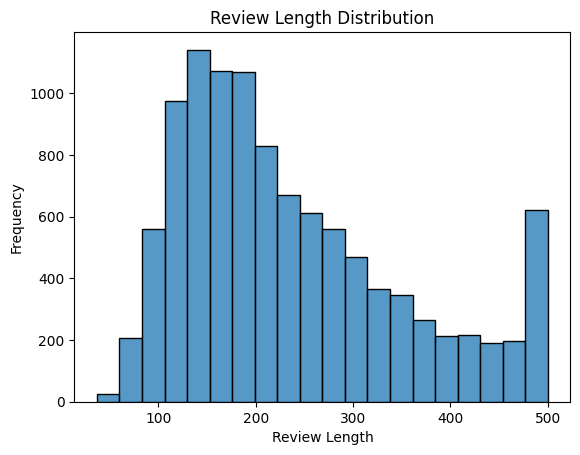

In [21]:
#Review Length Distribution: Analyze the distribution of review lengths. 

import seaborn as sns
# Assuming you have a DataFrame 'df' with a 'Reviews' column
final_data['Review Length'] = final_data['Reviews'].apply(len)

# Plot the review length distribution
sns.histplot(final_data['Review Length'], bins=20)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Review Length Distribution')
plt.show()


In [22]:
# Common Bigrams/Trigrams: Identify and visualize common bigrams or trigrams (two or three-word phrases) in the reviews.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a DataFrame 'df' with a 'Reviews' column
vectorizer = CountVectorizer(ngram_range=(2, 3), max_features=10)
X = vectorizer.fit_transform(final_data['Reviews'])

# Get the most common bigrams/trigrams
common_ngrams = vectorizer.get_feature_names_out()

print("Most Common Bigrams/Trigrams:")
print(common_ngrams)


Most Common Bigrams/Trigrams:
['app is' 'in the' 'is not' 'it is' 'of the' 'the app' 'the new'
 'this app' 'to the' 'to use']


In [ ]:
import pandas as pd
from transformers import pipeline

# Assuming you have a DataFrame 'df' with a 'Reviews' column
emotion_analyzer = pipeline("sentiment-analysis")

# Analyze emotions for each review
emotions = [emotion_analyzer(review)[0] for review in final_data['Reviews']]

print("Emotions Analysis:")
for i, emotion in enumerate(emotions):
    print(f"Review {i + 1}: {emotion['label']} (Confidence: {emotion['score']:.4f})")
